## PredictWithModel

This notebook deploys the mnist model saved in Watson Studio and uses it to predict the number written in an image

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from watson_machine_learning_client import WatsonMachineLearningAPIClient


Using TensorFlow backend.
2018-06-28 12:18:07,720 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"689270983","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}
2018-06-28 12:18:33,226 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"d8d8f12f9dfd99ec992ff3855b953290","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


Get Watson Machine Learning Credentials from IBM Cloud dashboard, similar to Cloud Object Storage, and paste below

In [2]:
wml_credentials = {
  "url": "https://ibm-watson-ml.mybluemix.net",
  "username": "a3e27bf9-2b60-4844-88ec-dfff829edba5",
  "password": "25fe23d8-6a13-4523-8fe5-10dea01d97e0",
  "instance_id": "630e57b3-5e9f-4721-8251-1035c8b69563"
}

In [3]:
client = WatsonMachineLearningAPIClient(wml_credentials)

The model saved in Watson Studio should appear below

In [4]:
client.repository.list_models()

------------------------------------  ---------------------  ------------------------  --------------
GUID                                  NAME                   CREATED                   FRAMEWORK
728c62e5-5a54-41d0-aaf2-cba13d82617c  MyTestModel            2018-05-03T14:14:21.897Z  tensorflow-1.5
e38b34cf-4f27-4454-9e77-be3dbc4f6ba3  mnist-hpo-saved-model  2018-05-03T14:42:18.544Z  tensorflow-1.5
b068cd10-c0da-494d-b8d2-0808011e1ecb  mnist-hpo-model-03     2018-05-28T08:55:05.463Z  tensorflow-1.5
------------------------------------  ---------------------  ------------------------  --------------


Copy the GUID from above and paste it below

In [7]:
deployment_details = client.deployments.create(name='mnist-hpo-deployment', model_uid='e38b34cf-4f27-4454-9e77-be3dbc4f6ba3')



#######################################################################################

Synchronous deployment creation for uid: 'e38b34cf-4f27-4454-9e77-be3dbc4f6ba3' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS.
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0acdd86c-7ff2-4349-9667-5ece74939c65'
------------------------------------------------------------------------------------------------




After "DEPLOY_SUCCESS" generate an API endpoint for the model

In [8]:
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/630e57b3-5e9f-4721-8251-1035c8b69563/published_models/e38b34cf-4f27-4454-9e77-be3dbc4f6ba3/deployments/0acdd86c-7ff2-4349-9667-5ece74939c65/online


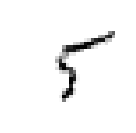

In [9]:
five = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0313725508749485,0.48235297203063965,0.6352941393852234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3294117748737335,0.40392160415649414,0.7921569347381592,0.8823530077934265,0.3333333432674408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07058823853731155,0.1568627506494522,0.6705882549285889,0.874509871006012,0.9411765336990356,0.9254902601242065,0.29019609093666077,0.22745099663734436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19215688109397888,0.250980406999588,0.5254902243614197,0.9411765336990356,1.0,0.9921569228172302,0.6313725709915161,0.22352942824363708,0.05490196496248245,0.1411764770746231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38431376218795776,0.8313726186752319,0.8352941870689392,0.9529412388801575,0.9921569228172302,0.9921569228172302,0.9921569228172302,0.7529412508010864,0.2666666805744171,0.08235294371843338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6274510025978088,0.9019608497619629,0.9058824181556702,0.9019608497619629,0.6235294342041016,0.3137255012989044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1411764770746231,0.3294117748737335,0.4745098352432251,0.10588236153125763,0.10588236153125763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16862745583057404,0.4941176772117615,0.3686274588108063,0.22352942824363708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3333333432674408,0.7921569347381592,0.1882353127002716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05490196496248245,0.9294118285179138,0.9529412388801575,0.13725490868091583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1411764770746231,0.7058823704719543,1.0,0.8235294818878174,0.7568628191947937,0.14509804546833038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125490203499794,0.24705883860588074,0.24705883860588074,0.7176470756530762,0.5568627715110779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5843137502670288,0.8000000715255737,0.03529411926865578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9960784912109375,0.8823530077934265,0.05490196496248245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9960784912109375,0.3686274588108063,0.01568627543747425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8627451658248901,0.04313725605607033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08627451211214066,0.6784313917160034,0.9960784912109375,0.24705883860588074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843137718737125,0.4901961088180542,0.9921569228172302,0.8784314393997192,0.125490203499794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08627451211214066,0.9921569228172302,0.7843137979507446,0.1411764770746231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01568627543747425,0.5098039507865906,0.027450982481241226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
five = five.reshape(28,28)
for i, image in enumerate([five]):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

Watson Studio will now use its deployed model to predict the image above. The model returns a .json with its confidence in all 10 classes, and selects the class with the highest probability as its 'prediction_class'

In [10]:
scoring_data = {"values":[[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0313725508749485,0.48235297203063965,0.6352941393852234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3294117748737335,0.40392160415649414,0.7921569347381592,0.8823530077934265,0.3333333432674408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07058823853731155,0.1568627506494522,0.6705882549285889,0.874509871006012,0.9411765336990356,0.9254902601242065,0.29019609093666077,0.22745099663734436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19215688109397888,0.250980406999588,0.5254902243614197,0.9411765336990356,1.0,0.9921569228172302,0.6313725709915161,0.22352942824363708,0.05490196496248245,0.1411764770746231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38431376218795776,0.8313726186752319,0.8352941870689392,0.9529412388801575,0.9921569228172302,0.9921569228172302,0.9921569228172302,0.7529412508010864,0.2666666805744171,0.08235294371843338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6274510025978088,0.9019608497619629,0.9058824181556702,0.9019608497619629,0.6235294342041016,0.3137255012989044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1411764770746231,0.3294117748737335,0.4745098352432251,0.10588236153125763,0.10588236153125763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16862745583057404,0.4941176772117615,0.3686274588108063,0.22352942824363708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3333333432674408,0.7921569347381592,0.1882353127002716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05490196496248245,0.9294118285179138,0.9529412388801575,0.13725490868091583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1411764770746231,0.7058823704719543,1.0,0.8235294818878174,0.7568628191947937,0.14509804546833038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125490203499794,0.24705883860588074,0.24705883860588074,0.7176470756530762,0.5568627715110779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5843137502670288,0.8000000715255737,0.03529411926865578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9960784912109375,0.8823530077934265,0.05490196496248245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9960784912109375,0.3686274588108063,0.01568627543747425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8627451658248901,0.04313725605607033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08627451211214066,0.6784313917160034,0.9960784912109375,0.24705883860588074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843137718737125,0.4901961088180542,0.9921569228172302,0.8784314393997192,0.125490203499794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08627451211214066,0.9921569228172302,0.7843137979507446,0.1411764770746231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01568627543747425,0.5098039507865906,0.027450982481241226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]}
predictions = client.deployments.score(scoring_url, scoring_data)
print("Scoring result: " + str(predictions))
print()
#print(list(predictions.values()))
print()
print("Prediction: " + str(list(predictions.values())[1][0][1]))

Scoring result: {'fields': ['prediction', 'prediction_classes', 'probability'], 'values': [[[9.711572602100205e-06, 3.479419863339217e-09, 4.652436214058753e-09, 2.149774900317425e-07, 5.401984970454521e-10, 0.9997922778129578, 5.376836753612224e-08, 6.830010534031317e-05, 0.00012677209451794624, 2.6669031285564415e-06], 5, [9.711572602100205e-06, 3.479419863339217e-09, 4.652436214058753e-09, 2.149774900317425e-07, 5.401984970454521e-10, 0.9997922778129578, 5.376836753612224e-08, 6.830010534031317e-05, 0.00012677209451794624, 2.6669031285564415e-06]]]}


Prediction: 5
